## Data Visualization Course | VNU-HCM University of Science.
### LAP02 - Working with time-series data
#### **STEP 03 - Example - DATA EXPLORATION AND VISUALIZATION**

In [53]:
import sys
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))

In [54]:
from Libraries import *
from Shared_Functions import *

**Đọc dữ liệu từ file đã được xử lý**

In [55]:
dataset_source_path = getGranDir() / 'Dataset'
processed_dataset_path = dataset_source_path / 'google_processed.csv'
df = getDataFrame(processed_dataset_path)

In [56]:
#TEST
df.head(10)

,Date,High,Low,Open,Close,Volume,Adj Close
0,2004-08-19,51.835709,47.800831,49.813290,49.982655,44871361.0,49.982655
1,2004-08-20,54.336334,50.062355,50.316402,53.952770,22942874.0,53.952770
2,2004-08-23,56.528118,54.321388,55.168217,54.495735,18342897.0,54.495735
3,2004-08-24,55.591629,51.591621,55.412300,52.239197,15319808.0,52.239197
4,2004-08-25,53.798351,51.746044,52.284027,52.802086,9232276.0,52.802086
5,2004-08-26,53.773445,52.134586,52.279045,53.753517,7128620.0,53.753517
6,2004-08-27,54.107193,52.647663,53.848164,52.876804,6241307.0,52.876804
7,2004-08-30,52.548038,50.814533,52.443428,50.814533,5221498.0,50.814533
8,2004-08-31,51.661362,50.889256,50.958992,50.993862,4941252.0,50.993862
9,2004-09-01,51.292744,49.648903,51.158245,49.937820,9181687.0,49.937820


**Nhận xét:** qua quá trình pre-proccessing trước đó thì ta nhận thấy tập dữ liệu đã được xử lý hoàn thiện. Khi này ta chỉ cần thực hiện bước tiếp sau khi đọc lại tập dữ liệu là thay đổi kiểu dữ liệu cho các cột sao cho chính xác.

In [57]:
df = changeDataType(df)

In [58]:
#TEST
df.dtypes

Date         datetime64[ns]
High                float64
Low                 float64
Open                float64
Close               float64
Volume              float64
Adj Close           float64
dtype: object

---

### DATA EXPLORATION & DATA VISUALIZATION

#### **Phần 2:** Phân tích chi tiết những biến động ngắn hạn của cổ phiếu

* Thực hiện tìm ba tháng gần nhất để dữ liệu đánh giá ngắn hạn được đảm bảo nhất.

In [59]:
nearest_date = df['Date'].max()
print("Ngày gần nhất với hiện tại trong dataset:", nearest_date)

Ngày gần nhất với hiện tại trong dataset: 2021-10-11 00:00:00


Vậy tháng gần nhất với hiện tại trong dataset là tháng 10 năm 2021.

Ta sẽ đánh giá 3 tháng gần nhất của dữ liệu: tháng 8/2021, tháng 9/2021, tháng 10/2021.

In [60]:
three_months_data = df[(df['Date'] >= '2021-08-01') & (df['Date'] <= '2021-10-31')]
# tính tổng số ngày trong 3 tháng gần nhất cần xét:
print("Tổng số ngày: ", three_months_data.shape[0])
# test 10 dòng đầu tiên
three_months_data.head(10)

Tổng số ngày:  50


,Date,High,Low,Open,Close,Volume,Adj Close
4267,2021-08-02,2720.409912,2693.389893,2709.689941,2719.790039,1007000.0,2719.790039
4268,2021-08-03,2726.709961,2683.669922,2720.000000,2725.600098,953200.0,2725.600098
4269,2021-08-04,2730.760010,2708.300049,2724.989990,2720.570068,826400.0,2720.570068
4270,2021-08-05,2739.000000,2712.000000,2720.570068,2738.800049,593300.0,2738.800049
4271,2021-08-06,2741.601074,2720.929932,2725.899902,2740.719971,678000.0,2740.719971
4272,2021-08-09,2766.429932,2728.574951,2738.979980,2760.040039,618700.0,2760.040039
4273,2021-08-10,2771.030029,2744.530029,2761.590088,2761.929932,801700.0,2761.929932
4274,2021-08-11,2776.955078,2747.000000,2765.659912,2753.790039,760200.0,2753.790039
4275,2021-08-12,2768.360107,2735.580078,2754.260010,2767.790039,732300.0,2767.790039
4276,2021-08-13,2773.479980,2760.100098,2767.149902,2768.120117,628600.0,2768.120117


- Tạo bản sao cho three_months_data

In [61]:
filtered_data = three_months_data.copy()
# test 10 dòng đầu tiên
filtered_data.head(10)

,Date,High,Low,Open,Close,Volume,Adj Close
4267,2021-08-02,2720.409912,2693.389893,2709.689941,2719.790039,1007000.0,2719.790039
4268,2021-08-03,2726.709961,2683.669922,2720.000000,2725.600098,953200.0,2725.600098
4269,2021-08-04,2730.760010,2708.300049,2724.989990,2720.570068,826400.0,2720.570068
4270,2021-08-05,2739.000000,2712.000000,2720.570068,2738.800049,593300.0,2738.800049
4271,2021-08-06,2741.601074,2720.929932,2725.899902,2740.719971,678000.0,2740.719971
4272,2021-08-09,2766.429932,2728.574951,2738.979980,2760.040039,618700.0,2760.040039
4273,2021-08-10,2771.030029,2744.530029,2761.590088,2761.929932,801700.0,2761.929932
4274,2021-08-11,2776.955078,2747.000000,2765.659912,2753.790039,760200.0,2753.790039
4275,2021-08-12,2768.360107,2735.580078,2754.260010,2767.790039,732300.0,2767.790039
4276,2021-08-13,2773.479980,2760.100098,2767.149902,2768.120117,628600.0,2768.120117


#### **1. Trong ba tháng gần nhất, khối lượng giao dịch trung bình nằm ở đầu tuần hay nằm ở những ngày gần cuối tuần là nhiều nhất?**

- Xét trong 3 tháng gần đây, có bao nhiêu ngày thứ 2, thứ 3, thứ 4, thứ 5, thứ 6, thứ 7 và chủ nhật

In [62]:
filtered_data['DayOfWeek'] = filtered_data['Date'].dt.day_name()
# test 10 dòng đầu tiên
filtered_data.head(10)
days_count = filtered_data['DayOfWeek'].value_counts().sort_index()
print("Số lượng ngày trong tuần:")
print(days_count)


Số lượng ngày trong tuần:
DayOfWeek
Friday       10
Monday       10
Thursday     10
Tuesday      10
Wednesday    10
Name: count, dtype: int64


- Trong dữ liệu, không có ngày thứ bảy và chủ nhật là hợp lý vì dữ liệu giao dịch thường không hoạt động vào cuối tuần.

In [63]:
# Số lượng giao dịch trong các thứ trong tuần:
totalVolumeByDay = filtered_data.groupby('DayOfWeek')['Volume'].mean().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'])
totalVolumeByDay.index = ['Thứ hai', 'Thứ ba', 'Thứ tư', 'Thứ năm', 'Thứ sáu']
totalVolumeByDay

Thứ hai    1053010.0
Thứ ba     1083920.0
Thứ tư      898160.0
Thứ năm     937400.0
Thứ sáu    1202670.0
Name: Volume, dtype: float64

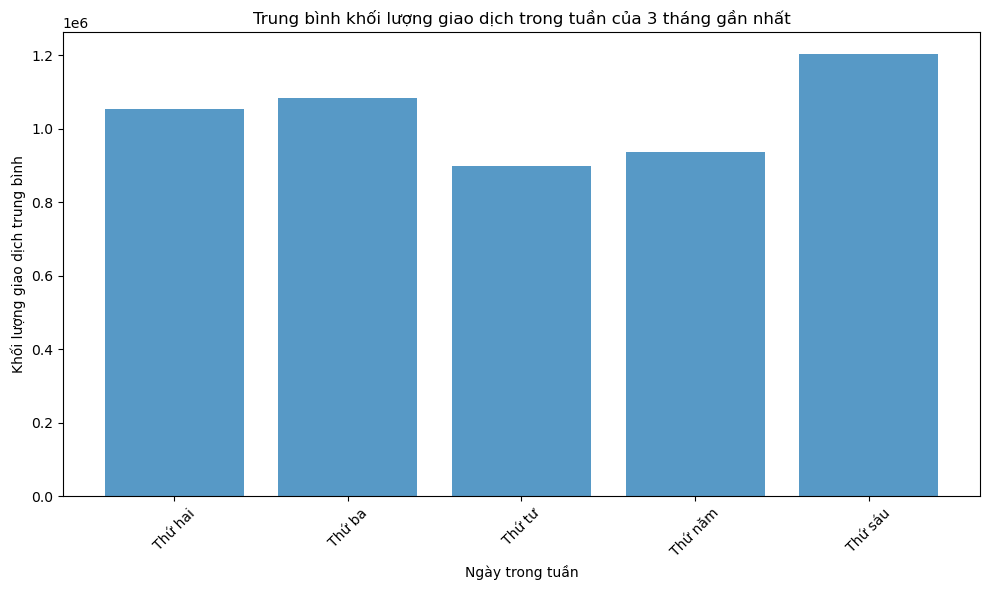

In [64]:
# Vẽ biểu đồ
plt.figure(figsize=(10, 6))
plt.bar(totalVolumeByDay.index, totalVolumeByDay.values, alpha=0.75)
plt.title('Trung bình khối lượng giao dịch trong tuần của 3 tháng gần nhất')
plt.ylabel('Khối lượng giao dịch trung bình')
plt.xlabel('Ngày trong tuần')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


**Tại sao sử dụng biểu đồ cột để trực quan khối lượng giao dịch trung bình của các thứ trong 3 tháng được xét?**

- Biểu đồ cột rất phù hợp trong việc sử dụng để so sánh các giá trị với nhau. Ở đây, người dùng cần so sánh đâu là thứ có khối lượng giao dịch là lớn nhất. Chính vì thế, sử dụng biểu đồ cột có thể giúp người nhìn dễ dàng nhận ra giá trị nào là lớn nhất. 

- Đồng thời biểu đồ cột còn rất thích hợp cho những dữ liệu có phân loại, vì có thể sắp xếp các thuộc tính phân loại đó một cách dễ dàng theo thứ tự. 

- Mặt khác, biểu đồ cột còn giúp người dùng không chỉ dễ dàng nhận diện về sự chênh lệch của các thứ, mà còn nắm được xu hướng thay đổi của dữ liệu theo các thứ trong tuần. 

**Nhận xét và kết luận:** 

- Vào các ngày thứ 6, khối lượng giao dịch trung bình cao hơn những ngày bình thường. Điều này có thể xuất phát từ việc các nhà đầu tư thường tận dụng những ngày cuối tuần - đây là những thời gian mà họ (đặc biệt là những nhà đầu tư cá nhân) cảm thấy thoải mái khi tham gia vào thị trường sau một tuần bận rộn. Đồng thời, đây cũng là thời điểm vô cùng thích hợp để họ có thể tận dụng cơ hội, chuẩn bị cho một tuần giao dịch mới. 

#### **2. Biến động giá cổ phiếu trong ngày trong 3 tháng gần nhất có cho thấy sự đặc trưng nào tiêu biểu không? (Ví dụ: giá mở cửa thường thấp hơn giá đóng cửa)**

- Ta sử dụng biểu đồ đường có chia theo khoảng thời gian để thể hiện biến động giữa giá mở cửa và giá đóng cửa của giá cổ phiếu trong ngày.


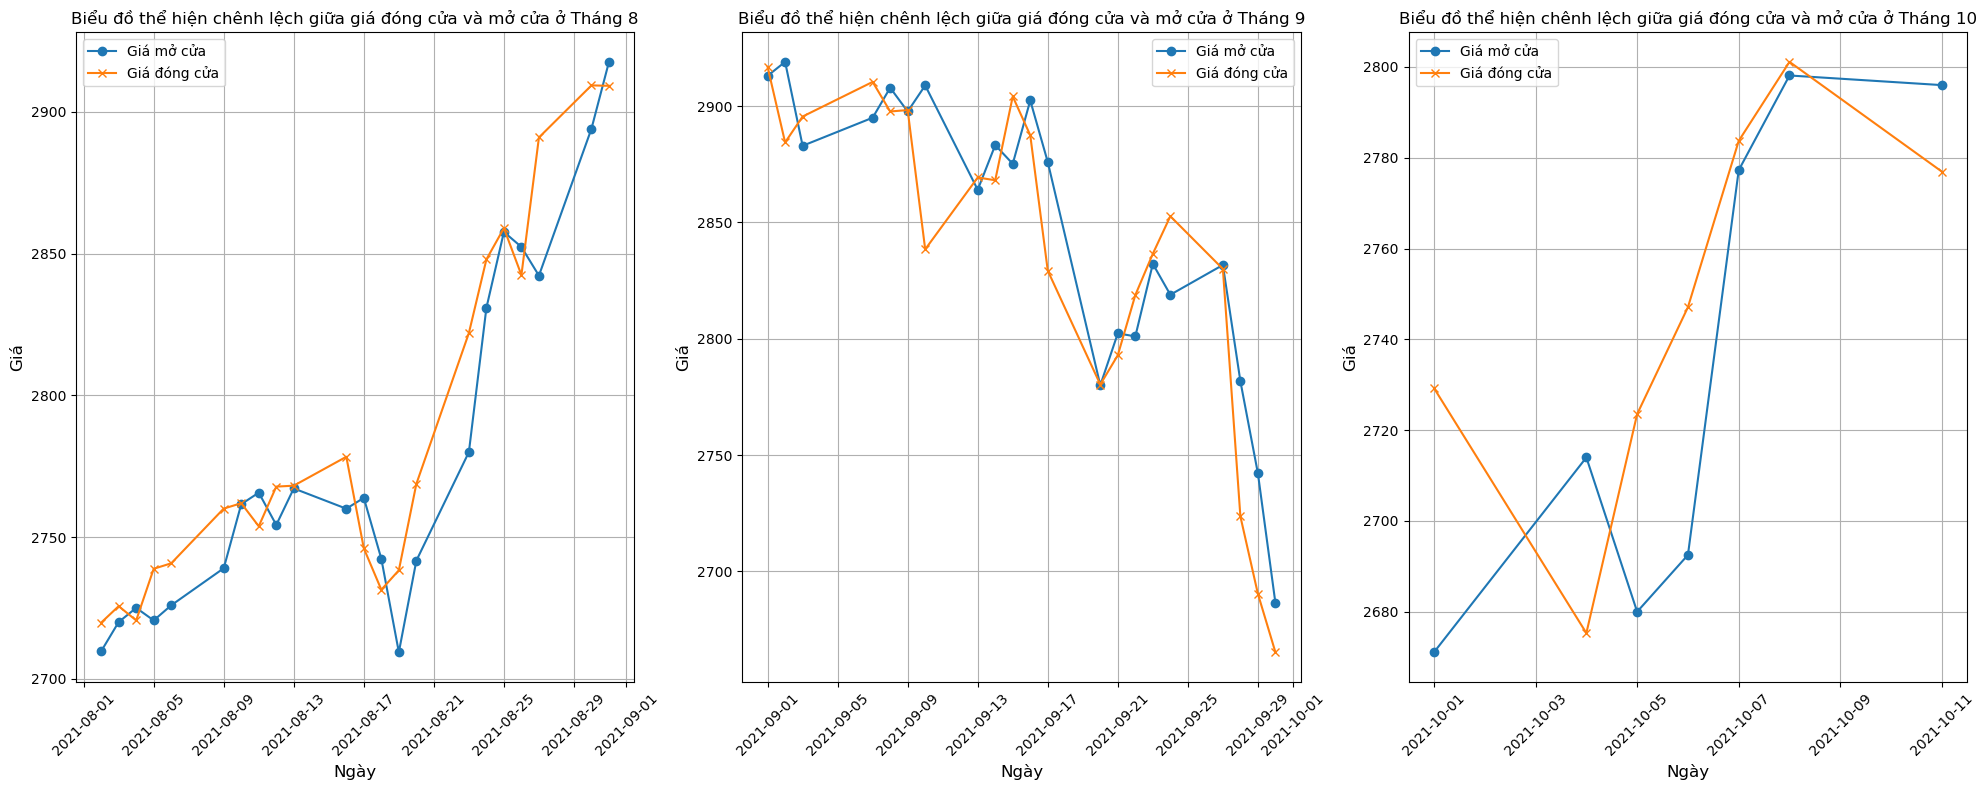

In [65]:
# Chia dữ liệu thành từng tháng
filtered_data['Month'] = filtered_data['Date'].dt.month
months = {8: 'Tháng 8', 9: 'Tháng 9', 10: 'Tháng 10'}


plt.figure(figsize=(20, 8))
# Tạo ra số thứ tự cho các tháng và thực hiện vòng lặp để duyệt các ngày theo tháng
for i, month in enumerate(months, 1):
    month_data = filtered_data[filtered_data['Month'] == month]
    # Vẽ subplots:
    plt.subplot(1, 3, i)
    # Vẽ biểu đồ đường để thể hiện giữa giá mở cửa và giá đóng cửa 
    plt.plot(month_data['Date'], month_data['Open'], label='Giá mở cửa', marker='o')
    plt.plot(month_data['Date'], month_data['Close'], label='Giá đóng cửa', marker='x')
    plt.title("Biểu đồ thể hiện chênh lệch giữa giá đóng cửa và mở cửa ở " + months[month], fontsize=12)
    plt.xlabel('Ngày', fontsize=12)
    plt.ylabel('Giá', fontsize=12)
    plt.xticks(rotation=45)
    plt.legend()
    plt.grid(True)
plt.tight_layout()
plt.show()


In [66]:
# Tính số ngày có giá đóng cửa cao hơn giá mở cửa trong 3 tháng dựa trên biểu đồ:
CloseLargerDays = (filtered_data['Close'] > filtered_data['Open']).sum()
print ("Số ngày có giá đóng cửa cao hơn giá mở cửa trong 3 tháng gần nhất: ", CloseLargerDays)
# Tính số ngày có giá đóng cửa thấp hơn giá mở cửa trong 3 tháng dựa trên biểu đồ:
CloseLowerDays = (filtered_data['Close'] < filtered_data['Open']).sum()
print ("Số ngày có giá đóng cửa thấp hơn giá mở cửa trong 3 tháng gần nhất: ", CloseLowerDays)

Số ngày có giá đóng cửa cao hơn giá mở cửa trong 3 tháng gần nhất:  31
Số ngày có giá đóng cửa thấp hơn giá mở cửa trong 3 tháng gần nhất:  19


**Tại sao sử dụng biểu đồ đường có chia theo khoảng thời gian?**
- Dữ liệu được phân nhóm rõ ràng, chia theo từng tháng sẽ giúp người xem dễ dàng tập trung vào từng giai đoạn cụ thể, từ đó mà không bị rối khi xem toàn bộ nội dung trong ba tháng cùng một lúc. 

- Đồng thời, người dùng còn có thể xem được xu hướng của giá mở cửa và giá đóng cửa theo từng tháng và không chỉ so sánh được xu hướng đó trong 1 tháng, mà còn so sánh được xu hướng của các tháng với nhau. 

**Nhận xét và kết luận**
- Vào tháng 8, biểu đồ cho thấy có nhiều ngày có giá đóng cửa cao hơn giá mở cửa.

- Vào tháng 9, xu hướng này lại không còn quá rõ ràng khi vẫn có một số ngày có giá mở cửa cao hơn giá đóng cửa. 

- Vào tháng 10, xu hướng lại đặc biệt rõ ràng khi hầu hết các ngày trong tháng có giá đóng cửa cao hơn giá mở cửa. 

- Nhìn nhận chung, trong ba tháng gần nhất, phần lớn các ngày (cụ thể là 31 ngày) có giá đóng cửa cao hơn giá mở cửa). Điều này cho thấy xu hướng của cổ phiếu trong 3 tháng gần nhất là tăng giá trong ngày. Đồng thời giá cổ phiếu tăng trong ngày còn thể hiện rằng những nhà đầu tư có nhiều kỳ vọng tích cực cho cổ phiếu của tập đoàn Alphabet Inc. (hay Google Inc.) 

#### **3. Có khi nào giá đóng cửa xấp xỉ gần với giá cao nhất hoặc giá thấp nhất trong ba tháng gần nhất hay không? Nếu có, điều này mang ý nghĩa gì đối với doanh nghiệp?**

- Ta sử dụng biểu đồ cột chồng lồng ghép để đánh giá mức độ chênh lệch giữa giá đóng cửa và giá cao nhất/ giá thấp nhất trong 3 tháng gần đây nhất.

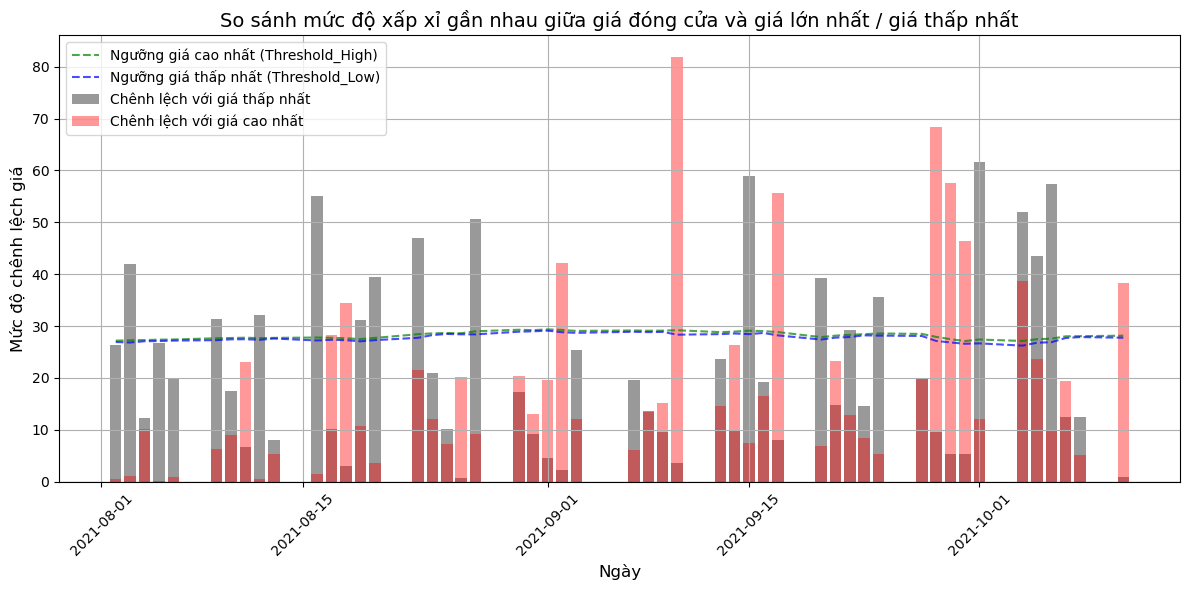

In [67]:
# Tính toán chênh lệch
filtered_data['Diff_High'] = np.abs(filtered_data['Close'] - filtered_data['High'])
filtered_data['Diff_Low'] = np.abs(filtered_data['Close'] - filtered_data['Low'])
filtered_data['Threshold_High'] = filtered_data['High'] * 0.01
filtered_data['Threshold_Low'] = filtered_data['Low'] * 0.01
# test 10 dòng đầu tiên
three_months_data.head(10)

# Xây dựng biểu đồ miền
plt.figure(figsize=(12, 6))
plt.bar(
    filtered_data['Date'],
    filtered_data['Diff_Low'],
    color='black',
    alpha=0.4,
    label='Chênh lệch với giá thấp nhất'
)
plt.bar(
    filtered_data['Date'],
    filtered_data['Diff_High'],
    color='red',
    alpha=0.4,
    label='Chênh lệch với giá cao nhất'
)
# Thêm các đường xác định ngưỡng 1% của giá cao nhất và giá thấp nhất
plt.plot(
    filtered_data['Date'],
    filtered_data['Threshold_High'],
    color='green',
    alpha=0.7,
    linestyle='--',
    label='Ngưỡng giá cao nhất (Threshold_High)'
)
plt.plot(
    filtered_data['Date'],
    filtered_data['Threshold_Low'],
    color='blue',
    alpha=0.7,
    linestyle='--',
    label='Ngưỡng giá thấp nhất (Threshold_Low)'
)

# Định dạng biểu đồ
plt.title('So sánh mức độ xấp xỉ gần nhau giữa giá đóng cửa và giá lớn nhất / giá thấp nhất', fontsize=14)
plt.xlabel('Ngày', fontsize=12)
plt.ylabel('Mức độ chênh lệch giá', fontsize=12)
plt.axhline(y=0, color='black', linewidth=0.8)
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Hiển thị biểu đồ
plt.show()

In [68]:
# Thống kê số ngày giá đóng cửa gần giá cao nhất / thấp nhất
close_to_high = (filtered_data['Diff_High'] <= filtered_data['Threshold_High']).sum()
close_to_low = (filtered_data['Diff_Low'] <= filtered_data['Threshold_Low']).sum()

print("Số ngày giá đóng cửa gần giá cao nhất trong 3 tháng gần nhất: ", close_to_high)
print("Số ngày giá đóng cửa gần giá thấp nhất trong 3 tháng gần nhất: ", close_to_low)

Số ngày giá đóng cửa gần giá cao nhất trong 3 tháng gần nhất:  40
Số ngày giá đóng cửa gần giá thấp nhất trong 3 tháng gần nhất:  34


**Giải thích biểu đồ**
- Trong biểu đồ, có 2 ngưỡng giá cần quan tâm, đó là ngưỡng giá cao nhất (là giá cao nhất được biểu diễn ở ngưỡng 1%) và ngưỡng giá thấp nhất (là giá thấp nhất được biểu diễn ở ngưỡng 1%). Tuy nhiên, do 2 đường khá sát nhau, nên ta sẽ xem 2 đường là một đường ngưỡng chung. 

- Vùng có màu xám đen thể hiện các mức độ chênh lệch theo ngày của giá đóng cửa và giá thấp nhất. 

- Vùng có màu đỏ nhạt thể hiện các mức độ chênh lệch theo ngày của giá đóng cửa và giá cao nhất. 

- Vùng màu đỏ đậm xuất hiện do có sự giao nhau giữa vùng màu đỏ nhạt và vùng màu xám đen (tức là khi chênh lệch của giá đóng cửa với giá thấp nhất trùng với chênh lệch của giá đóng cửa với giá cao nhất). 

- Nếu mức chênh lệch của giá đóng cửa với giá thấp nhất trong ngày (cột màu xám đen) nhỏ hơn đường ngưỡng, ngày đó có giá đóng cửa gần với giá thấp nhất trong ngày. 

- Nếu mức chênh lệch của giá đóng cửa với giá cao nhất trong ngày (cột màu đỏ) nhỏ hơn đường ngưỡng, ngày đó có giá đóng cửa gần với giá cao nhất trong ngày. 

**Tại sao sử dụng biểu đồ cột chồng lồng ghép trong việc đánh giá mức độ chênh lệch giữa giá đóng cửa và giá cao nhất/ giá thấp nhất trong 3 tháng gần nhất là phù hợp?** 

- Biểu đồ cột chồng lồng ghép cho phép người dùng nhận diện cụ thể hai mức chênh lệch khác nhau giữa giá đóng cửa với giá thấp nhất và giá đóng cửa với giá cao nhất. Nhờ vậy, người dùng có thể dễ dàng nhận biết giá đóng cửa gần với giá nào hơn mà không bị nhầm lẫn.  

- Không chỉ vậy, người dùng còn có thể dễ dàng so sánh được các xu hướng của mức chênh lệch theo các ngày liên tiếp nhau. 

**Nhận xét và kết luận:** 

- Ta có thể thấy, số ngày có giá đóng cửa gần giá cao nhất là cao hơn số ngày có giá đóng cửa gần với giá thấp nhất (cụ thể là số ngày có giá đóng cửa gần giá cao nhất là 40, và số ngày có giá đóng cửa gần với giá thấp nhất là 34 ngày). 

- Điều này cho thấy các nhà đầu tư có niềm tin cao đối với cổ phiếu và doanh nghiệp, đây là một dấu hiệu tích cực về triển vọng kinh doanh của doanh nghiệp. Mặt khác, giá đóng cửa gần giá cao nhất có thể cho thấy sự ổn định trong kỳ vọng cũa doanh nghiệp do ít biến động tiêu cực trong ngày. 

- Tuy nhiên, số ngày có giá đóng cửa gần với giá thấp nhất cũng khá cao. Điều này cho thấy có vài ngày, giá cổ phiếu thiếu sự ổn định. Việc này có thể xuất phát từ việc quá trình được xét (năm 2021) là thời gian chịu nhiều tác động tiêu cực từ đại dịch COVID-19, với sự suy giảm kinh tế toàn cầu. Chính vì thế, tâm lý của các nhà đầu tư có sự thay đổi liên tục (một số nhà đầu tư, đặc biệt là các nhà đầu tư nhỏ lẻ, chọn cách bán cổ phiếu để thu vốn, đảm bảo quyền lợi của bản thân).  

- Vì thế, sự chênh lệch giữa giá đóng cửa và giá thấp nhất / giá cao nhất chưa được chênh lệch nhiều. 

#### **4. Mối quan hệ giữa khối lượng giao dịch và biên độ dao động (high-low) hằng ngày trong 3 tháng gần nhất**

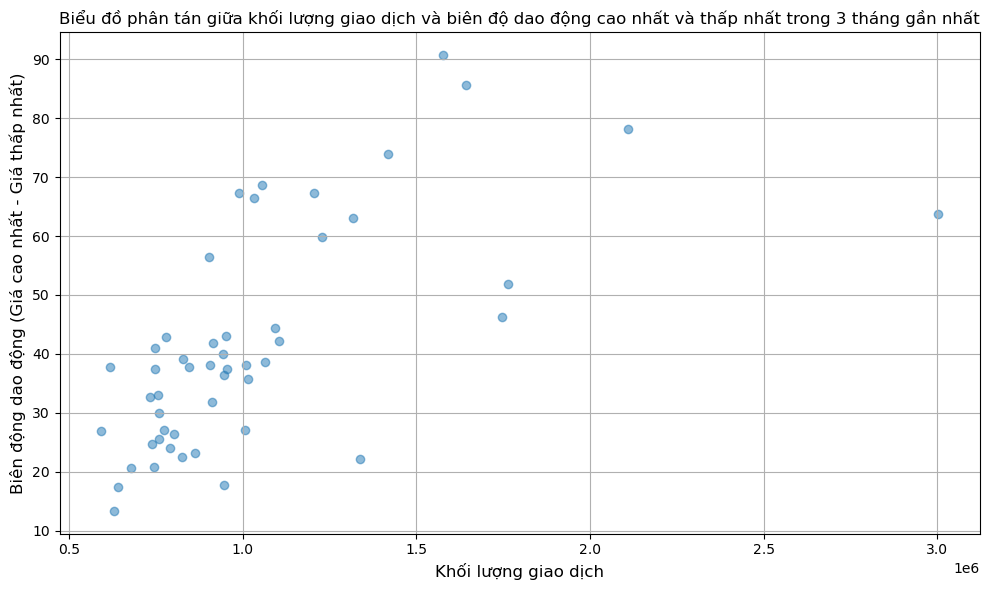

Hệ số tương quan:  0.6347764119867266


In [69]:
# Tính biên độ dao động: High - Low
filtered_data['Range'] = filtered_data['High'] - filtered_data['Low']

# Tính hệ số tương quan giữa khối lượng giao dịch và biên độ dao động
correlation = filtered_data[['Volume', 'Range']].corr().iloc[0, 1]

# Vẽ biểu đồ Scatter Plot
plt.figure(figsize=(10, 6))
plt.scatter(filtered_data['Volume'], filtered_data['Range'], alpha=0.5)
plt.title('Biểu đồ phân tán giữa khối lượng giao dịch và biên độ dao động cao nhất và thấp nhất trong 3 tháng gần nhất', fontsize=12)
plt.xlabel('Khối lượng giao dịch', fontsize=12)
plt.ylabel('Biên động dao động (Giá cao nhất - Giá thấp nhất)', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

# Hiển thị hệ số tương quan
print("Hệ số tương quan: ", correlation)


**Tại sao sử dụng biểu đồ phân tán trong việc thể hiện mối quan hệ giữa khối lượng giao dịch và biên độ dao động (cao nhất - thấp nhất) trong 3 tháng gần nhất là phù hợp?** 

- Biểu đồ phân tán giúp người dùng nhìn thấy mối quan hệ tuyến tính giữa khối lượng giao dịch và biên độ dao động giá (khi khối lượng giao dịch tăng, biên độ dao động giá cũng tăng). 

- Đồng thời, người dùng có thể quan sát được sự phân bố của các cụm điểm quan hệ, các điểm gần nhau cho thấy phần lớn dữ liệu sẽ tập trung ở một khu vực nhất định. 

- Mặt khác, người dùng còn có thể so sánh mối quan hệ này của các ngày giao dịch với nhau và đưa ra nhận xét rằng ngày nào có giao dịch cao hơn, ngày nào có giá biến động cao hơn. 

**Nhận xét và kết luận**
- Phân bố dữ liệu của cụm điểm tập trung ở biên độ dao động từ 20 đến 50 và khối lượng giao dịch từ 0.5 đến 1.5 triệu cổ phiếu. 

- Với hệ số tương quan là 0.63  (mối tương quan dương trung bình), ta có thể thấy khi khối lượng giao dịch tăng, biên độ dao động giá cũng có xu hướng tăng theo, nhưng không quá chặt chẽ. Chính vì thế, ta có thể nhận định rằng, ngoài khối lượng giao dịch, biên độ dao động giá có thể bị ảnh hưởng bới các yếu tố bên ngoài khác dẫn đến sự chênh lệch của giá cao nhất và giá thấp nhất. 

- Khi khối lượng giao dịch tăng, giá cả cũng có xu hướng biến động nhiều hơn, doanh nghiệp có thể tận dụng thông tin này để dự đoán và chuẩn bị cho các giai đoạn biến động lớn khi khối lượng giao dịch tăng cao. Đồng thời sự tăng của khối lượng giao dịch kèm theo biên độ dao động lớn có thể phản ánh tâm lý biến động của các nhà đầu tư, từ đó, doanh nghiệp có thể theo dõi để nhận biết các xu hướng, điều chỉnh các chính sách, truyền thông để tăng thêm thu hút từ các nhà đầu tư. 

### **KẾT LUẬN TỔNG QUAN VỀ KHOẢNG THỜI GIAN NGẮN HẠN (3 THÁNG GẦN NHẤT) CỦA CỔ PHIẾU GOOGLE:**
Với 3 tháng gần nhất (tháng 8/2021, 9/2021, 10/2021):  

- Xu hướng khối lượng giao dịch trung bình cao nhất nằm ở thứ 6 cuối tuần. Điều này cho thấy nhà đầu tư có xu hướng gia tăng hoạt động giao dịch trước khi thị trường đóng cửa cuối tuần. Có thể một phần các nhà đầu tư khá lo ngại về những thông tin bất ngờ vào cuối tuần của doanh nghiệp. 

- Biến động cổ phiếu Google cho thấy xu hướng khá tích cực trong 3 tháng gần nhất, với giá đóng cửa thường cao hơn giá mở cửa. Điều này cho thấy cổ phiếu Google có sức hút và giá trị vững chắc trên thị trường. 

- Mặt khác, giá đóng cửa có xu hướng xấp xỉ giá cao nhất trong ngày. Điều này cho thấy các nhà đầu tư thường kỳ vọng cao vào cổ phiếu Google và giữ vững nhu cầu đến cuối ngày giao dịch. Tuy nhiên, vẫn có nhiều ngày giá đóng cửa có xu hướng xấp xỉ giá thấp nhất trong ngày. Có thể điều này xuất phát từ tâm lý khá biến động của các nhà đầu tư khi thế giới đang có nhiều vấn đề về khủng hoảng kinh tế trong và sau đại dịch COVID-19. 

- Bên cạnh đó, khi khối lượng giao dịch tăng, biên độ dao động của giá cao nhất và thấp nhất cũng có xu hướng thăng theo. Donah nghiệp có thể sử dụng những thông tin này để dự đoán các giai đoạn thị trường có thể xuất hiện cơ hội và rủi ro lớn, từ đó tối ưu hóa chiến lược tài chính của bản thân. 
